 Case Study: Movie Data Analysis

This notebook uses a dataset from the MovieLens website. We will describe the dataset further as we explore with it using pandas.

Download the Dataset

Please note that you will need to download the dataset.

Here are the links to the data source and location:

    Data Source: MovieLens web site (filename: ml-20m.zip)
    Location: https://grouplens.org/datasets/movielens/

Once the download completes, please make sure the data files are in a directory called movielens in your pandas folder.

Let us look at the files in this dataset using the UNIX command ls.

In [1]:
# Note: Adjust the name of the folder to match your local directory

!ls ./movielens

genome-scores.csv  Icon       movies.csv   tags.csv
genome-tags.csv    links.csv  ratings.csv


In [2]:
!cat ./movielens/movies.csv | wc -l


45844


In [4]:
!cat ./movielens/ratings.csv | wc -l

26024290


In [6]:
!head -5 ./movielens/ratings.csv

Use Pandas to Read the Dataset

In this notebook, we will be using three CSV files:

    ratings.csv : userId,movieId,rating, timestamp
    tags.csv : userId,movieId, tag, timestamp
    movies.csv : movieId, title, genres

Using the read_csv function in pandas, we will ingest these three files.

In [7]:
import subprocess

p = subprocess.Popen(["head", "-n 3", "./movielens/movies.csv"], stdout=subprocess.PIPE)

output, err = p.communicate()
print(output)

b'movieId,title,genres\r\n1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy\r\n2,Jumanji (1995),Adventure|Children|Fantasy\r\n'


In [3]:
import pandas as pd
#movies = pd.read_csv('./movielens/movies.csv')
movies = pd.read_csv('./movielens/movies.csv', sep=',')
print(type(movies))
movies.head(10)

<class 'pandas.core.frame.DataFrame'>


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [4]:
# Timestamps represent seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970
import pandas as pd
tags = pd.read_csv('./movielens/tags.csv', sep=',')
tags.head(10)

,userId,movieId,tag,timestamp
0,1,318,narrated,1425942391
1,20,4306,Dreamworks,1459855607
2,20,89302,England,1400778834
3,20,89302,espionage,1400778836
4,20,89302,jazz,1400778841
5,20,89302,politics,1400778841
6,20,96079,nostalgic,1407930249
7,20,113315,coming of age,1407837917
8,20,113315,dark comedy,1407838006
9,20,113315,kafkaesque,1407837913


In [1]:
import pandas as pd
ratings = pd.read_csv('./movielens/ratings.csv', sep=',', parse_dates=['timestamp'])
ratings.head(10)

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556
5,1,1968,4.0,1425942148
6,1,2762,4.5,1425941300
7,1,2918,5.0,1425941593
8,1,2959,4.0,1425941601
9,1,4226,4.0,1425942228


In [5]:
# For current analysis, we will remove timestamp (we will come back to it!)

del ratings['timestamp']
del tags['timestamp']

KeyError: 'timestamp'

### Series

In [6]:
#Extract 0th row: notice that it is infact a Series
row_0 = tags.iloc[0]
type(row_0)

pandas.core.series.Series

In [7]:
print(row_0)

userId                1
movieId             318
tag            narrated
timestamp    1425942391
Name: 0, dtype: object


In [8]:
row_0.index

Index(['userId', 'movieId', 'tag', 'timestamp'], dtype='object')

In [9]:
row_0['userId']

1

In [10]:
'rating' in row_0

False

In [11]:
row_0.name

0

In [12]:
row_0 = row_0.rename('first_row')
row_0.name

'first_row'

### DataFrames 

In [13]:
tags.head()

,userId,movieId,tag,timestamp
0,1,318,narrated,1425942391
1,20,4306,Dreamworks,1459855607
2,20,89302,England,1400778834
3,20,89302,espionage,1400778836
4,20,89302,jazz,1400778841


In [14]:
tags.index

RangeIndex(start=0, stop=753170, step=1)

In [15]:
tags.columns

Index(['userId', 'movieId', 'tag', 'timestamp'], dtype='object')

In [19]:
# Extract row 0, 11, 2000 from DataFrame

tags.iloc[ [0,11,2000] ]

,userId,movieId,tag,timestamp
0,1,318,narrated,1425942391
11,20,113315,satire,1407838056
2000,886,260,Science Fiction,1433535242


### Descriptive Statistics

Let's look how the ratings are distributed! 

In [20]:
ratings['rating'].describe()

count    2.602429e+07
mean     3.528090e+00
std      1.065443e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

In [21]:
ratings.describe()


,userId,movieId,rating
count,2.602429e+07,2.602429e+07,2.602429e+07
mean,1.350371e+05,1.584911e+04,3.528090e+00
std,7.817620e+04,3.108526e+04,1.065443e+00
min,1.000000e+00,1.000000e+00,5.000000e-01
25%,6.716400e+04,1.073000e+03,3.000000e+00
50%,1.351630e+05,2.583000e+03,3.500000e+00
75%,2.026930e+05,6.503000e+03,4.000000e+00
max,2.708960e+05,1.762750e+05,5.000000e+00


In [22]:
ratings['rating'].mean()

3.5280903543608817

In [23]:
ratings.mean()

userId     135037.090248
movieId     15849.109677
rating          3.528090
dtype: float64

In [24]:
ratings['rating'].min()

0.5

In [25]:
ratings['rating'].max()

5.0

In [26]:
ratings['rating'].std()

1.0654427637644484

In [28]:
ratings['rating'].mode()

0    4.0
dtype: float64

In [29]:
ratings.corr()

,userId,movieId,rating
userId,1.000000,-0.001410,-0.000159
movieId,-0.001410,1.000000,-0.002841
rating,-0.000159,-0.002841,1.000000


In [30]:
filter_1 = ratings['rating'] > 5
print(filter_1)
filter_1.any()

0           False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
            ...  
26024259    False
26024260    False
26024261    False
26024262    False
26024263    False
26024264    False
26024265    False
26024266    False
26024267    False
26024268    False
26024269    False
26024270    False
26024271    False
26024272    False
26024273    False
26024274    False
26024275    False
26024276    False
26024277    False
26024278    False
26024279    False
26024280    False
26024281    False
26024282    False
26024283  

False

In [35]:
filter_2 = ratings['rating'] > 0
filter_2
filter_2.any()

True

### Data Cleaning: Handling Missing Data

In [36]:
movies.shape

(45843, 3)

In [37]:
#is any row NULL ?

movies.isnull().any()

movieId    False
title      False
genres     False
dtype: bool

Thats nice ! No NULL values !

In [38]:
ratings.shape

(26024289, 3)

In [39]:
#is any row NULL ?

ratings.isnull().any()

userId     False
movieId    False
rating     False
dtype: bool

In [ ]:
tags.shape

In [40]:
#is any row NULL ?

tags.isnull().any()

userId       False
movieId      False
tag           True
timestamp    False
dtype: bool

We have some tags which are NULL.


In [41]:
tags = tags.dropna()

In [42]:
#Check again: is any row NULL ?

tags.isnull().any()

userId       False
movieId      False
tag          False
timestamp    False
dtype: bool

In [43]:
tags.shape

(753154, 4)

Thats nice ! No NULL values ! Notice the number of lines have reduced.

### Data Visualization

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f218a2b6e48>]], dtype=object)

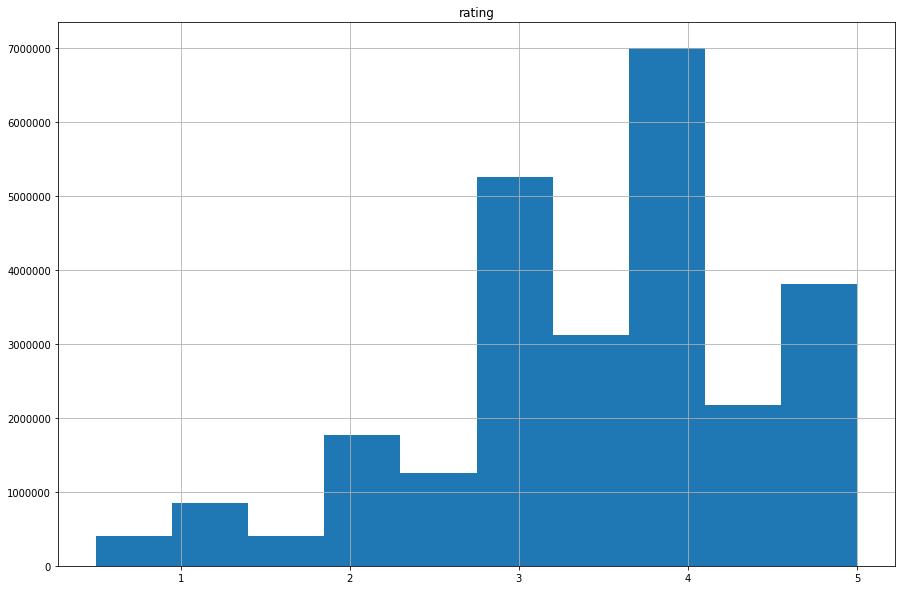

In [44]:
%matplotlib inline

ratings.hist(column='rating', figsize=(15,10))

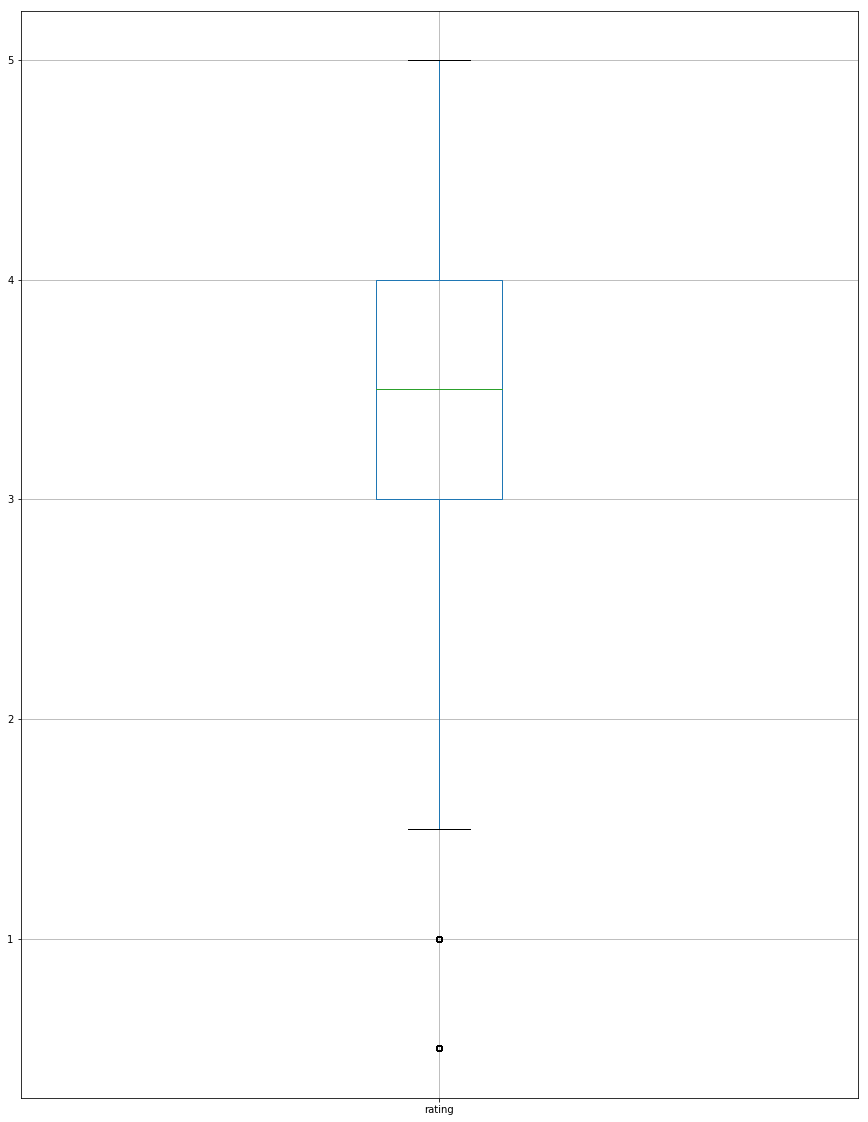

In [45]:
ratings.boxplot(column='rating', figsize=(15,20))

### Slicing Out Columns

In [ ]:
tags['tag'].head()

In [ ]:
movies[['title','genres']].head()

In [ ]:
ratings[-10:]

In [ ]:
tag_counts = tags['tag'].value_counts()
tag_counts[-10:]

In [ ]:
tag_counts[:10].plot(kind='bar', figsize=(15,10))

### Filters for Selecting Rows

In [ ]:
is_highly_rated = ratings['rating'] >= 4.0

ratings[is_highly_rated][30:50]

In [ ]:
is_animation = movies['genres'].str.contains('Animation')

movies[is_animation][5:15]

In [ ]:
movies[is_animation].head(15)

### Group By and Aggregate

In [46]:
ratings_count = ratings[['movieId','rating']].groupby('rating').count()
ratings_count


,movieId
rating,
0.5,404897
1.0,843310
1.5,403607
2.0,1762440
2.5,1255358
3.0,5256722
3.5,3116213
4.0,6998802
4.5,2170441


In [47]:
average_rating = ratings[['movieId','rating']].groupby('movieId').mean()
average_rating.head()

,rating
movieId,
1,3.888157
2,3.236953
3,3.175550
4,2.875713
5,3.079565


In [48]:
movie_count = ratings[['movieId','rating']].groupby('movieId').count()
movie_count.tail()

,rating
movieId,
176267,1
176269,1
176271,1
176273,1
176275,1


In [ ]:
movie_count = ratings[['movieId','rating']].groupby('movieId').count()
movie_count.head()

### Merge Dataframes

In [ ]:
tags.head()

In [ ]:
movies.head()

In [ ]:
t = movies.merge(tags, on='movieId', how='inner')
t.head()

### Reference: 
    http://pandas.pydata.org/pandas-docs/stable/merging.html

### Combine aggreagation, merging, and filters to get useful analytics 

In [ ]:
avg_ratings = ratings.groupby('movieId', as_index=False).mean()
del avg_ratings['userId']
avg_ratings.head()

In [ ]:
box_office = movies.merge(avg_ratings, on='movieId', how='inner')
box_office.tail()

In [ ]:
is_highly_rated = box_office['rating'] >= 4.0

box_office[is_highly_rated][-5:]

In [ ]:
is_comedy = box_office['genres'].str.contains('Comedy')

box_office[is_comedy][:5]

In [ ]:
box_office[is_comedy & is_highly_rated][-5:]

### Vectorized String Operations

In [ ]:
movies.head()

In [ ]:
##Split 'genres' into multiple columns 
movie_genres = movies['genres'].str.split('|', expand=True)
movie_genres[:10]

In [ ]:
# Add a new column for comedy genre flag 
movie_genres['isComedy'] = movies['genres'].str.contains('Comedy')
movie_genres[:10]

In [ ]:
##Extract year from title e.g. (1995) 
movies['year'] = movies['title'].str.extract('.*\((.*)\).*', expand=True)
movies.tail()

### Reference: 
    
 http://pandas.pydata.org/pandas-docs/stable/text.html#text-string-methods

### Parsing Timestamps

Timestamps are common in sensor data or other time series datasets. Let us revisit the tags.csv dataset and read the timestamps!

In [ ]:
tags = pd.read_csv('./movielens/tags.csv', sep=',')

In [ ]:
tags.dtypes

In [ ]:
tags.head(5)

In [ ]:
tags['parsed_time'] = pd.to_datetime(tags['timestamp'], unit='s')

In [ ]:
tags['parsed_time'].dtype

In [ ]:
tags.head(2)

### Selecting rows based on timestamps


In [ ]:
greater_than_t = tags['parsed_time'] > '2015-02-01'

selected_rows = tags[greater_than_t]

tags.shape, selected_rows.shape

In [ ]:
### Sorting the table using the timestamps
tags.sort_values(by='parsed_time', ascending=True)[:10]

### Average Movie Ratings over Time
Are Movie ratings related to the year of launch?

In [ ]:
average_rating = ratings[['movieId','rating']].groupby('movieId', as_index=False).mean()
average_rating.tail()

In [ ]:
joined = movies.merge(average_rating, on='movieId', how='inner')
joined.head()
joined.corr()

In [ ]:
yearly_average = joined[['year','rating']].groupby('year', as_index=False).mean()
yearly_average[:10]

In [ ]:
yearly_average[-20:].plot(x='year', y='rating', figsize=(15,10), grid=True)